In [1]:
# All Imports used
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
import math
import glob
import open3d as o3d
import time

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# load the lidar (world points)
lidar_points = np.load("./data/Task_1234/000000.npy")[:,:3] #xyz

# read the corresponding image
img = cv2.cvtColor(cv2.imread("./data/Task_1234/000000.jpg"), cv2.COLOR_BGR2RGB)

## load camera_parameters: 
with open("./data/Task_1234/config.json") as f:
    camera_params = json.load(f)

In [3]:
# Function to visualise Lidar Point Cloud
def visulaize_points(points, points_1):
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    pcd.colors = o3d.utility.Vector3dVector([[255,0,0]]*points.shape[0])
    pcd_1 = o3d.geometry.PointCloud()
    pcd_1.points = o3d.utility.Vector3dVector(points_1)
    pcd_1.colors = o3d.utility.Vector3dVector([[0,255,0]]*points_1.shape[0])
    o3d.visualization.draw_geometries([pcd, pcd_1])

### Translate the lidar_points by a integer value along all X,Y and Z axis 

In [4]:
display("Initial Matrix",lidar_points)                                                          #Printing lidar matrix containting lidar points
count_nonzero=np.count_nonzero(lidar_points)
translation_matrix=np.random.randint(count_nonzero, size=(len(lidar_points),3))                 #Generation of random values for translation matrix
translated_matrix=lidar_points[75182:,:]+translation_matrix[75182,:]                            #Addition of translation matrix to the lidar matrix containing lidar points
display("Final Matrix",translated_matrix)                                                       #Printing the lidar matrix after applying transation      
visulaize_points(lidar_points,translated_matrix)                                                # Visualise the Lidar Point Cloud

'Initial Matrix'

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        ],
       [-0.43391621, -0.01302891, -0.16368146],
       [-0.45135465, -0.03522889, -0.17362393]])

'Final Matrix'

array([[162125.        , 174046.        , 129313.        ],
       [162125.        , 174046.        , 129313.        ],
       [162164.73516464, 174022.50467682, 129317.126544  ],
       ...,
       [162125.        , 174046.        , 129313.        ],
       [162124.56608379, 174045.98697109, 129312.83631854],
       [162124.54864535, 174045.96477111, 129312.82637607]])

### Rotate the lidar_points by 30 degrees along Z-axis

In [5]:
display("Initial Matrix",lidar_points)                                                          # Printing lidar matrix containting lidar points

# In order to rotate the points along Z-axis we need to apply the following formula:
# x=x*cos(theta)-y*sin(theta)
# y=x*sin(theta)+y*cos(theta)            here theta should be in radians
theta=math.radians(30)                                                                          # Converting degrees into radians

# Now rotating the lidar points by 30 degrees along Z-axis
for i in range (len(lidar_points)):                                                                          
    x=lidar_points[i,0]*math.cos(theta) - lidar_points[i,1]*math.sin(theta)                     # Applying x=x*cos(theta)-y*sin(theta)
    y=lidar_points[i,0]*math.sin(theta) + lidar_points[i,1]*math.cos(theta)                     # Applying y=x*sin(theta)+y*cos(theta) 
    
    if i == 0:
        X_axis=[x]                                                                              # Initialising X_axis variable
        y_axis=[y]                                                                              # Initialising Y_axis variable
    else:
        X_axis=np.append(X_axis,[x],axis=0)                                                     # Concatenating the new terms to the old terms to get points in X axis
        y_axis=np.append(y_axis,[y],axis=0)                                                     # Concatenating the new terms to the old terms to get points in y axis

z_axis=lidar_points[:,2]                                                                        # Since terms in z axis do not change we can use the original values
v_stack=np.vstack((X_axis,y_axis))                                                              
final_matrix=np.vstack((v_stack,z_axis))    
final_matrix=np.transpose(final_matrix)                                                         
display("Final matrix",final_matrix)                                                            # Printing final matrix
visulaize_points(lidar_points,final_matrix) 

'Initial Matrix'

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        ],
       [-0.43391621, -0.01302891, -0.16368146],
       [-0.45135465, -0.03522889, -0.17362393]])

'Final matrix'

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        ],
       [-0.369268  , -0.22824148, -0.16368146],
       [-0.37327015, -0.25618644, -0.17362393]])

### Rotate the lidar_points by 45 degrees along X-axis and Translate with random value along Z-axis

In [6]:
display("Initial Matrix",lidar_points)                                                          # Printing lidar matrix containting lidar points

# In order to rotate the points along X-axis we need to apply the following formula:
# y=y*cos(theta)-z*sin(theta)
# z=y*sin(theta)+z*cos(theta)            here theta should be in radians

theta=math.radians(45)

# Now rotating the lidar points by 45 degrees along X-axis
for i in range (len(lidar_points)):
    y=lidar_points[i,1]*math.cos(theta) - lidar_points[i,2]*math.sin(theta)                     # Applying y=y*cos(theta)-z*sin(theta)
    z=lidar_points[i,1]*math.sin(theta) + lidar_points[i,2]*math.cos(theta)                     # Applying z=y*sin(theta)+z*cos(theta) 
    
    if i == 0:
        y_axis=[y]                                                                              # Initalising y_axis variable
        z_axis=[z]                                                                              # Initialising z_axis variable
    else:
        y_axis=np.append(y_axis,[y],axis=0)                                                     # Concatenating the old terms to the new terms to get points in y axis
        z_axis=np.append(z_axis,[z],axis=0)                                                     # Concatenating the old terms to the new terms to get points in z axis

x_axis=lidar_points[:,0]                                                                        # Since terms in x axis do not change we can use the original values
v_stack=np.vstack((y_axis,z_axis))
not_final_matrix=np.vstack((x_axis,v_stack))
not_final_matrix=np.transpose(not_final_matrix)

# Now translating the points along z axis
translation_matrix=np.random.randint(len(lidar_points), size=(len(lidar_points),1))             # Generation of random values for translation matrix
translation_matrix=translation_matrix.reshape(131072,1)
for i in range (len(lidar_points)):
    if i == 0:
        Z_translated=not_final_matrix[i,2]+translation_matrix[i]                                # Initialising Z axis
    else:
        Z_translated1=not_final_matrix[i,2]+translation_matrix[i]                               # Addin the terms of z axis with translation
        Z_translated=np.append(Z_translated,Z_translated1,axis=0)                               # Concatenating the new terms with old terms to get the values of z axis


v_stack=np.vstack((y_axis,Z_translated))
final_matrix=np.vstack((x_axis,v_stack))
final_matrix=np.transpose(final_matrix)
display("Final Matrix",final_matrix)                                                            # Printing of final matrix
visulaize_points(lidar_points,final_matrix)

'Initial Matrix'

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        ],
       [-0.43391621, -0.01302891, -0.16368146],
       [-0.45135465, -0.03522889, -0.17362393]])

'Final Matrix'

array([[ 0.00000000e+00,  0.00000000e+00,  1.19996000e+05],
       [ 0.00000000e+00,  0.00000000e+00,  8.17980000e+04],
       [ 0.00000000e+00,  0.00000000e+00,  1.17231000e+05],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  1.09276000e+05],
       [-4.33916211e-01,  1.06527439e-01,  5.21187505e+03],
       [-4.51354653e-01,  9.78600774e-02,  3.97685232e+03]])

### Project the lidar points on to image and Visualize

'Lidar Points'

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        ],
       [-0.43391621, -0.01302891, -0.16368146],
       [-0.45135465, -0.03522889, -0.17362393]])

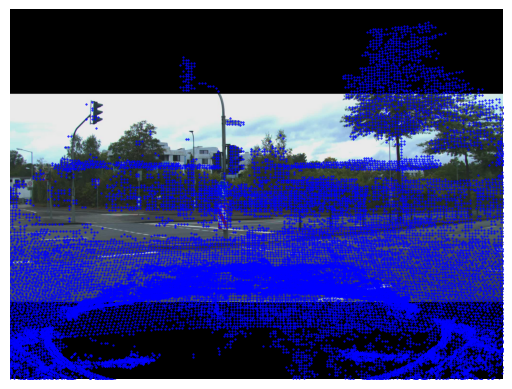

Elapsed time: 135.04791593551636 seconds


In [7]:
start_time=time.time()
display("Lidar Points",lidar_points)                                                            # Printing lidar points that need to mapped to the image                            
one_matrix=np.array([0,0,0,1]).reshape(1,4)                                                     # Matrix of shape 1,4 and values [0,0,0,1] to be concatenated to the extrinsic camera matrix to convert it into a 4x4 matrix 
kmatrix=camera_params['intrinsic']                                                              # Getting intrinsic camera matrix from the camera_params tuple
kmatrix=np.reshape(kmatrix,(3,3)).T                                                             
zero_dimensional_matrix=np.array([0,0,0]).reshape(3,1)                                          # Matrix of shape 3,1 and values [0,0,0] to be conca    tenated to the intrinsic camera matrix to convert it into a 3x4 matrix
k_matrix=np.hstack((kmatrix,zero_dimensional_matrix))
r_t=camera_params['extrinsic']                                                                  # Getting extrinsic camera matrix from the camera_params tuple
r_t=np.reshape(r_t,(4,3)).T                                                                     
extrinsic_matrix=np.vstack((r_t,one_matrix))                                                    

P=np.matmul(k_matrix,extrinsic_matrix)                                                          # Matrix multiplication of intrinsic and extrinsic camera matrix gives camera matrix P
onematrix=np.array([1]).reshape(1,1)                                                            # Matrix of shape 1,1 and value [1] to be concatenated to every [x,y,z] matrix so that matrix multiplication can take place between the coordinate matrix and P matrix

# Getting the values in homogeneous coordinate system
for i in range (len(lidar_points)):
    # Every row represents a lidar point in X,Y,Z coordinate system
    row=lidar_points[i,:]                                                                       # Getting the X,Y,Z coordinate in a matrix of shape 1x3                             
    column=row.reshape(3,1)                                                                     # Converting it into a 3x1 shape
    Centre_Point=np.vstack((column,onematrix))                                                  # Concatenating the onematrix to the world coordinate matrix
    if i == 0:
        # Initialising the homogeneous coordinate matrix 
        UVW=np.matmul(P,Centre_Point)                                                           # Matrix multiplication of camera matrix with World coordinate points   
        continue
    else:
        uvwcoordinate=np.matmul(P,Centre_Point)                                                 # Matrix multiplication of camera matrix with World coordinate points
        UVW=np.append(UVW,uvwcoordinate,axis=1)                                                 # Concatenating the old values to the new values to get the homogeneous coordinates U,V,W
UVW=np.transpose(UVW)

# Converting the homogeneous coordinates U,V,W to image coordinate x,y
for a in range (len(lidar_points)):
    # Image coordinates can be calculated by:
    # x=u/w & v=v/w
    u=UVW[a,0]                                                                                  
    v=UVW[a,1]
    w=UVW[a,2]
    if a==0:
        # Initialising the image coordinate
        x=[u/w]                                                                                 # Applying the formula x=u/w                                                        
        y=[v/w]                                                                                 # Applying the formula v=v/w
    else:
        x1=[u/w]                                                                                # Applying the formula x=u/w 
        y1=[v/w]                                                                                # Applying the formula v=v/w
        x=np.append(x,x1)                                                                       # Concatenate the old values to the new values to get the image coordinate x
        y=np.append(y,y1)                                                                       # Concatenate the old values to the new values to get the image coordinate y

# Dislpaying the points on the image
for f in range(len(lidar_points)):
    plt.plot(x[f],y[f],marker='o',color='blue',markersize=0.5)
plt.axis('off')                                                                                 # Does not show the x axis and y axis while printing the image
plt.imshow(img)
plt.show()
end_time=time.time()
elapsed_time=end_time-start_time
print(f"Elapsed time: {elapsed_time} seconds")